## Min and Max radius assumptions for iris

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

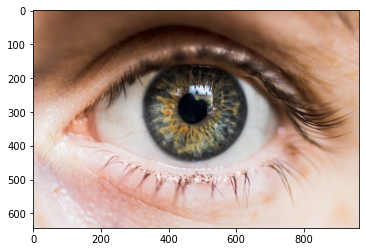

In [19]:
img_cv = cv2.imread('../images/right_eye_open.png', cv2.IMREAD_COLOR)
img = plt.imread('../images/right_eye_open.png')
plt.imshow(img)

In [20]:
print(img.shape)

(643, 964, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resized Dimensions :  (400, 600, 4)


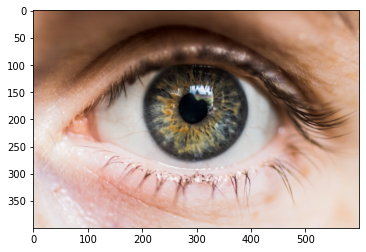

In [21]:
dim = (600,400)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
print('Resized Dimensions : ',resized.shape)

In [22]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, (5, 5),0,0)
# plt.imshow(gray_blurred)

In [23]:
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 50, minRadius = 150, maxRadius = 250)

In [24]:
detected_circles

array([[[476.5, 286.5, 158.1],
        [300.5, 374.5, 159.2],
        [454.5, 272.5, 152.6]]], dtype=float32)

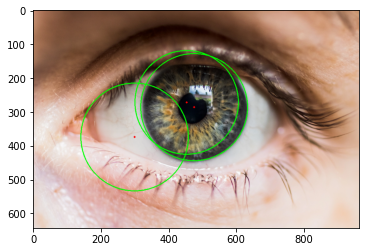

In [25]:
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img_cv, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img_cv, (a, b), 1, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))